In [ ]:
# the code will be using Linaear regression 
# The dataset is from kaggle
# The goal is to predict students grade using the selected variables

### Analysing the data

In [31]:
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os
import pickle


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
df = pd.read_csv("C:\\Users\\Kyla\\Downloads\\Student_performance_data _.csv")

In [33]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [34]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [35]:
df.shape

(2392, 15)

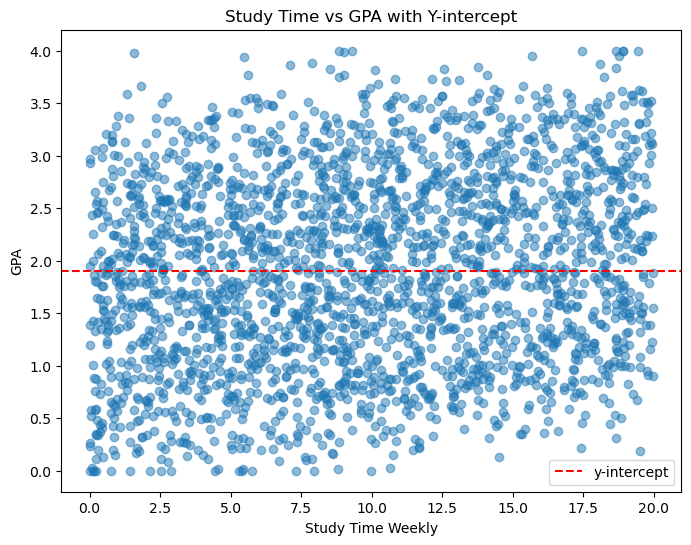

In [36]:
# A scatter plot with y-intercept
plt.figure(figsize=(8, 6))
plt.scatter(df['StudyTimeWeekly'], df['GPA'], alpha=0.5)
plt.axhline(y=df['GPA'].mean(), color='r', linestyle='--', label='y-intercept')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.title('Study Time vs GPA with Y-intercept')
plt.legend()
plt.show()


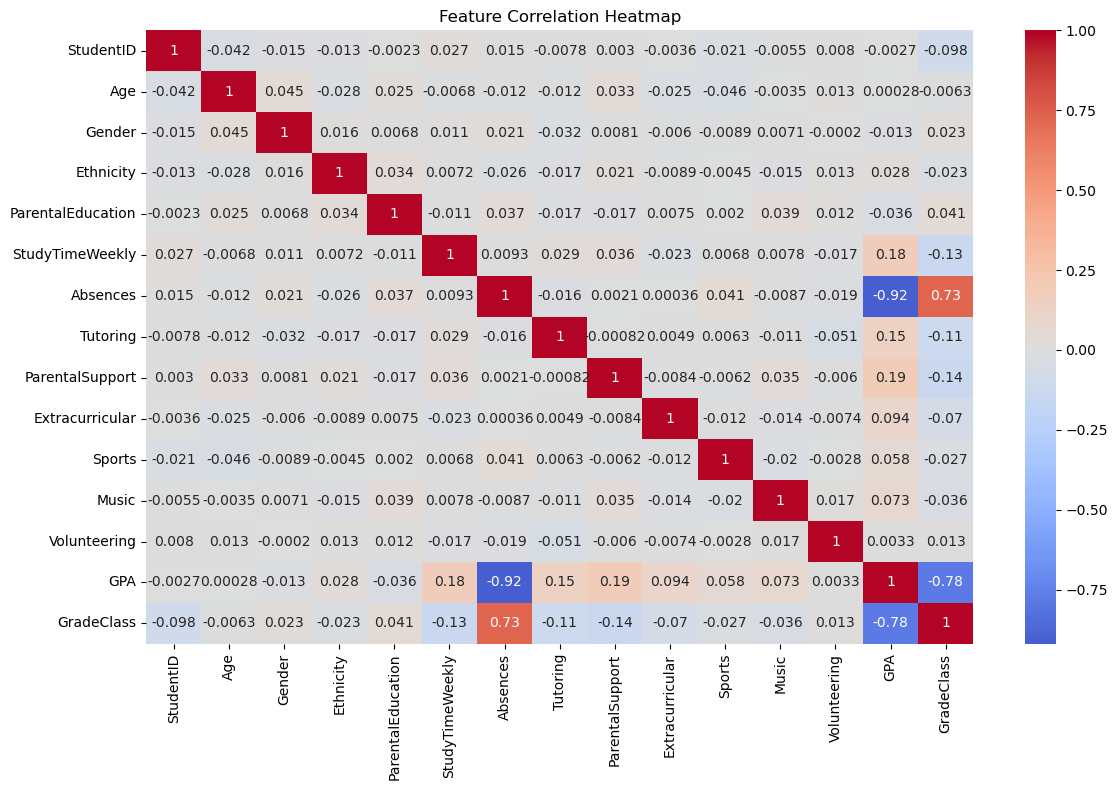

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [38]:
# top correlations with GPA (excluding GradeClass)
gpa_correlations = correlation_matrix['GPA'].abs().sort_values(ascending=False)
print("\nCorrelations with GPA:")
print(gpa_correlations)


Correlations with GPA:
GPA                  1.000000
Absences             0.919314
GradeClass           0.782835
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
ParentalEducation    0.035854
Ethnicity            0.027760
Gender               0.013360
Volunteering         0.003258
StudentID            0.002697
Age                  0.000275
Name: GPA, dtype: float64


### Test and training the dataset

In [39]:
# Picking the variables for X
selected_features = [ 'Absences', 'ParentalSupport', 'StudyTimeWeekly', 'Tutoring']

In [40]:
# Prepare features and target
features = selected_features
X = df[features]
y = df['GPA']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1913, 4)
Testing set shape: (479, 4)


### Creating the Linear Regression  Model

In [42]:
#!pip install scikit-learn

In [43]:
# Import the sckit learn linear model for testing 
from sklearn.linear_model import LinearRegression

In [44]:
#Builiding the linear regression 
lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
lr.score(X_test, y_test)

0.9283499603686272

In [47]:
y_pred = lr.predict(X_test)
# print(y_pred)

### Evaluation model  Using LinearRegression by getting the RMSE


In [48]:
from sklearn.metrics import  mean_squared_error
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

In [49]:
print(f"Mean Squared Error: {lr_mse}")
print(f"Root Mean Squared Error: {lr_rmse}")

Mean Squared Error: 0.05924975456782601
Root Mean Squared Error: 0.24341272474508396


### Compare Of the Random Forest , LinearRegression and  Decision Tree and Doing Comparison of the three Models 

In [50]:
# Initialize models
lr_model =  LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Dictionary to store models
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

In [51]:
# Train models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'rmse': rmse,
        'r2': r2
    }
    
    print(f"{name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

Linear Regression Results:
RMSE: 0.2434
R2 Score: 0.9283
Decision Tree Results:
RMSE: 0.3513
R2 Score: 0.8508
Random Forest Results:
RMSE: 0.2662
R2 Score: 0.9143


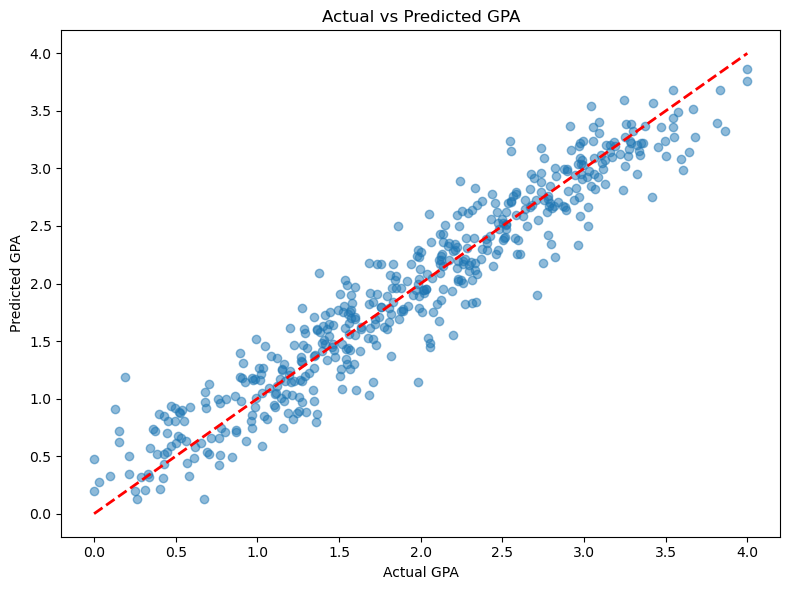

In [52]:
# Ploting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')
plt.tight_layout()
plt.show()

In [53]:
best_model_name = min(results.keys(), key=lambda k: results[k]['rmse'])
print(f"\nBest performing model: {best_model_name}")
print(f"Best RMSE: {results[best_model_name]['rmse']:.4f}")


Best performing model: Linear Regression
Best RMSE: 0.2434


### Saving the best model as .pklfile based on the loss metric 

In [54]:
best_model = results[best_model_name]['model']

# Saved the model using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

### !pip freeze > requiment.tx

In [55]:
## Generate requirements.txt
requirements = """
pandas==1.5.3
numpy==1.23.5
scikit-learn==1.2.2
matplotlib==3.7.1
seaborn==0.12.2
joblib==1.2.0
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements.strip())

In [56]:

# Load the saved model
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Features used in the model
selected_features = [ 'Absences', 'ParentalSupport', 'StudyTimeWeekly', 'Tutoring']
# Predictions
sample_student = pd.DataFrame([[16, 5, 2, 2]], columns=features)

# Make predictions
try:
    prediction = loaded_model.predict(sample_student)
    print(f"Predicted GPA: {prediction[0]:.2f}")
except Exception as e:
    print(f"Error during prediction: {e}")

Predicted GPA: 2.41


### Create a script that will use the model to make the predications that will be used in API 

In [57]:
# Load the saved model
def load_model(model_path: str):
    """
    Load the pre-trained model from a .pckl file.
    
    Args:
        model_path (str): Path to the saved model file.
        
    Returns:
        model: Loaded model object.
    """
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    return model


def predict_gpa(input_data: dict, model):
    """
    Making a GPA prediction using the loaded model.
    
    Args:
        input_data (dict): Dictionary containing the input features and their values.
        model: The trained model to use for prediction.
        
    Returns:
        float: Predicted GPA.
    """
    # Define the order of features as expected by the model
    feature_order = [ 'Absences', 'ParentalSupport', 'StudyTimeWeekly', 'Tutoring']
    
    # Convert input data to a NumPy array
    input_array = np.array([[input_data[feature] for feature in feature_order]])
    
    # Make a prediction
    predicted_gpa = model.predict(input_array)[0]
    return predicted_gpa


In [ ]:
# Used this to see if the predication is working  after loading the data 
if __name__ == "__main__":
    # Load the saved model
    model_path = "model.pkl"
    model = load_model(model_path)

    # Example input data
    example_input = {
        "Absences": 3,
        "ParentalSupport": 1,
        "StudyTimeWeekly": 10.5,
        "Tutoring": 4,
    }

    # Make a prediction
    predicted_gpa = predict_gpa(example_input, model)
    print(f"Predicted GPA: {predicted_gpa}")

Predicted GPA: 3.876942056882294


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
